## <font color="red">Aprendendo representações com Deep Learning: arquiteturas, treinamento e transferência de aprendizado</font>
#### **IV Escola Avançada em Big Data Analysis**
#### *ICMC - Universidade de São Paulo*

Moacir A. Ponti

---

### Redes Densas (estilo Multilayer Perceptron) e Convolucionais

---


## Exemplo de uso de redes neurais profundas para classificação de imagens

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
# testando o uso de GPU
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


O pacote Keras contém datasets que podem ser usados para testes e prototipagem
Ver mais em: https://keras.io/api/datasets/

In [3]:
# carregando datasets do keras
#from tensorflow.keras.datasets import mnist, cifar10, cifar100

from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


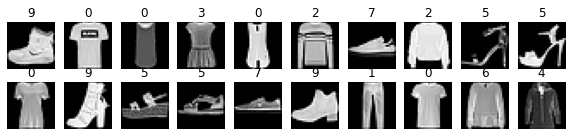

In [4]:
# visualizando 20 imagens do dataset
fig, axes = plt.subplots(2,10, figsize=(10,2))
ax = axes.ravel()
for i in range(20):
    ax[i].imshow(x_train[i], cmap="gray")
    ax[i].set_title("%d" % (y_train[i]))
    ax[i].axis('off')

In [5]:
# obtendo informações das imagens (resolucao) e dos rótulos (número de classes)
img_lin, img_col = x_train.shape[1], x_train.shape[2]
num_classes = len(np.unique(y_train))
print(x_train.shape)
print('Classes: ', num_classes)

(60000, 28, 28)
Classes:  10


Temos portando 60 mil exemplos de treinamento

Imagens de tamanho $28\times 28$ e 10 classes.

Vamos pré-processar os dados para facilitar a otimização:
1. Normalizar seus valores (para o intervalo 0-1)
2. Alterar a codificação das classes (para one-hot-encoding): vetor com 10 dimensões

In [6]:
# dividir por 255 para obter normalizacao 0-1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print("Antes da transformação dos dados de rótulo: ", y_train[0])
# transformar categorias em one-hot-encoding
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print("Após transformação dos dados de rótulo ", y_train[0])

Antes da transformação dos dados de rótulo:  9
Após transformação dos dados de rótulo  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


Por fim, vamos padronizar o formato de entrada em termos das dimensões (shape) do numpy array de entrada.

Isso vai permitir que o mesmo código utilize diferentes bases de dados, com um ou mais canais de cor

In [7]:
# verifica imagens da base de dados tem 3 canais (RGB) ou apenas 1 (escala de cinza)
if (len(x_train.shape) == 3):
      n_channels = 1
else:
      n_channels = x_train.shape[3]

# re-formata o array de forma a encontrar o formato da entrada (input_shape)
# se a dimensão dos canais vem primeiro ou após a imagem
if keras.backend.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], n_channels, img_lin, img_col)
    x_test = x_test.reshape(x_test.shape[0], n_channels, img_lin, img_col)
    input_shape = (n_channels, img_lin, img_col)
else:
    x_train = x_train.reshape(x_train.shape[0], img_lin, img_col, n_channels)
    x_test = x_test.reshape(x_test.shape[0], img_lin, img_col, n_channels)
    input_shape = (img_lin, img_col, n_channels)

print("Shape: ", input_shape)

Shape:  (28, 28, 1)


### Rede com unidades densas

In [8]:
# concorrente número um, no canto direito!
MLP = keras.Sequential()
# precisamos achatar a imagem para um vetor antes de começar
MLP.add(keras.layers.Flatten(input_shape=input_shape)) 
MLP.add(keras.layers.Dense(128, activation="relu"))
MLP.add(keras.layers.Dense(128, activation="relu"))
MLP.add(keras.layers.Dense(64, activation="relu"))
MLP.add(keras.layers.Dropout(0.2))
MLP.add(keras.layers.Dense(10, activation='softmax'))
MLP.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 125,898
Trainable params: 125,898
Non-trainable params: 0
__________________________________________________

### Rede com unidades convolucionais e pooling

In [9]:
CNN = keras.Sequential()
CNN.add(keras.layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=input_shape))
CNN.add(keras.layers.Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
CNN.add(keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)))
CNN.add(keras.layers.Conv2D(96, kernel_size=(3,3), strides=(2,2),  padding='same', activation='relu'))
CNN.add(keras.layers.Flatten())
CNN.add(keras.layers.Dropout(0.2))
CNN.add(keras.layers.Dense(10, activation='softmax'))
CNN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 96)          55392     
_________________________________________________________________
flatten_1 (Flatten)          (None, 4704)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4704)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)               

---
### Compilando os modelos com parâmetros de otimização

In [10]:
# as sementes ajudam a ter resultados reproduzíveis
from numpy.random import seed
seed(1)
from tensorflow.random import set_seed
set_seed(2)

MLP.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.05, momentum=0.9),
              metrics=['accuracy'])

CNN.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=0.05, momentum=0.9),
              metrics=['accuracy'])

# vamos usar o mesmo número de épocas e batchsize para ambos
batch_size = 64
epochs = 10

### **Treinamento** - ajuste (fit) dos parâmetros por meio de batches

In [11]:
histMLP = MLP.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs, verbose=0)

# avalia resultado nos conjuntos de treinamento e teste
scoreMLP_Tr = MLP.evaluate(x_train, y_train, verbose = 0)
scoreMLP_Te = MLP.evaluate(x_test, y_test, verbose = 1)

313/313 [==============================] - 1s 3ms/step - loss: 0.3780 - accuracy: 0.8738


In [12]:
histCNN = CNN.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs, verbose=1)

# avalia resultado nos conjuntos de treinamento e teste
scoreCNN_Tr = CNN.evaluate(x_train, y_train, verbose = 0)
scoreCNN_Te = CNN.evaluate(x_test, y_test, verbose = 0)

Epoch 1/10
938/938 [==============================] - 10s 11ms/step - loss: 0.4793 - accuracy: 0.8308
Epoch 2/10
938/938 [==============================] - 10s 11ms/step - loss: 0.3114 - accuracy: 0.8894
Epoch 3/10
938/938 [==============================] - 10s 11ms/step - loss: 0.2783 - accuracy: 0.8980
Epoch 4/10
938/938 [==============================] - 10s 10ms/step - loss: 0.2599 - accuracy: 0.9058
Epoch 5/10
938/938 [==============================] - 10s 11ms/step - loss: 0.2442 - accuracy: 0.9118
Epoch 6/10
938/938 [==============================] - 10s 11ms/step - loss: 0.2321 - accuracy: 0.9157
Epoch 7/10
938/938 [==============================] - 10s 11ms/step - loss: 0.2195 - accuracy: 0.9201
Epoch 8/10
938/938 [==============================] - 10s 11ms/step - loss: 0.2074 - accuracy: 0.9240
Epoch 9/10
938/938 [==============================] - 10s 11ms/step - loss: 0.2014 - accuracy: 0.9269
Epoch 10/10
938/938 [==============================] - 10s 11ms/step - loss: 0.193

In [13]:
print("MLP Acurácia treinamento: %.4f" % (scoreMLP_Tr[1]))
print("MLP Acurácia teste: %.4f" % (scoreMLP_Te[1]))

print("CNN Acurácia treinamento: %.4f" % (scoreCNN_Tr[1]))
print("CNN Acurácia teste: %.4f" % (scoreCNN_Te[1]))

MLP Acurácia treinamento: 0.8978
MLP Acurácia teste: 0.8738
CNN Acurácia treinamento: 0.9502
CNN Acurácia teste: 0.9138


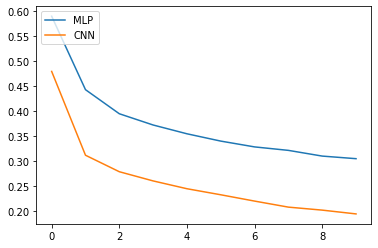

In [14]:
plt.plot(histMLP.history['loss'])
plt.plot(histCNN.history['loss'])
plt.legend(["MLP", "CNN"], loc="upper left")